Hands-on Activity 1.2 - Training Neural Networks


**Names:** SERRANO, Jio A.<br>
**Course and Section:** CPE019 - CPE32S3 <br>
**Date of Submission**: April 2, 2024 <br>
**Instructor:** Engr. Roman Richard<br>


# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:

filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
677,0,93,60,0,0,35.3,0.263,25,0
478,8,126,74,38,75,25.9,0.162,39,0
37,9,102,76,37,0,32.9,0.665,46,1
53,8,176,90,34,300,33.7,0.467,58,1
299,8,112,72,0,0,23.6,0.840,58,0


**Remarks**: The dataset contains 768 rows and 9 columns. In a dataset, the rows represent the entries or the number of instances. The columns on the other hand, represent the attributes or variables.

In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

**Remarks**: Using the `types` method allows us to see the data type of the column names or the attributes. From the above result, we can see that the attributes are all numerical values that are either `int` or `float`.

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

**Remarks**: Splitting the dataset is necessary in training neural networks. This allows us to evaluate the model's perfromance on unseen data and to test whether the model was really able to learn anything from the training [1].

[1] J. Moon, “A Beginner’s Guide to Splitting Machine Learning Datasets in Python,” Medium, Dec. 18, 2022. https://medium.com/@moonchangin/how-to-split-machine-learning-datasets-in-python-scikit-learn-d0a60cc30929 (accessed Mar. 31, 2024).
‌

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

**Remarks**: Several resources [2]-[4] state that it is important to normalize the dataset due to the following reasons:

* Normalizing the dataset by rescaling them (usually in the range of 0 to 1) allows the training process to converge more quickly.

* It prevents the weights from becoming too large or too small.

* Normalization helps in training the model on different features with varying scales by providing a similar scale for the features allowing us to use higher learning rates for faster convergence.

[2] “The Importance Of Normalizing Data Before Training A Neural Network – Surfactants,” Surfactants.net, Dec. 11, 2022. https://www.surfactants.net/the-importance-of-normalizing-data-before-training-a-neural-network/ (accessed Mar. 31, 2024).
‌

[3] Zhe Ming Chng, “Using Normalization Layers to Improve Deep Learning Models - MachineLearningMastery.com,” MachineLearningMastery.com, Jun. 14, 2022. https://machinelearningmastery.com/using-normalization-layers-to-improve-deep-learning-models/ (accessed Mar. 31, 2024).
‌

[4] Towards AI Team, “How, When, and Why Should You Normalize / Standardize / Rescale Your Data?,” Towards AI, May 29, 2020. https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff (accessed Mar. 31, 2024).
‌

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:
model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Remarks**: The number of params is computed by [5]:

For `Dense`: $ 12 * 8 + 1 (bias) = 108 $
<br>
For `dense_1` $ 1 * 12 + 1 (bias) = 13 $

The multiplicand is the number of neurons in the layer and the multiplier is the number of inputs for that layer. For `Dense`, there are 12 neurons and 8 input features. For `dense_1`, there are 1 neuron and 12 inputs (from previous layers). Each has a bias term, hence the plus 1.

[5] user3501476, “Keras model.summary() result - Understanding the # of Parameters,” Stack Overflow, 2024. https://stackoverflow.com/questions/36946671/keras-model-summary-result-understanding-the-of-parameters (accessed Mar. 31, 2024).
‌

Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 1s 25ms/step - loss: 0.6395 - accuracy: 0.6910 - val_loss: 0.6279 - val_accuracy: 0.6927
Epoch 2/200
18/18 [==============================] - 0s 11ms/step - loss: 0.6309 - accuracy: 0.7031 - val_loss: 0.6188 - val_accuracy: 0.6979
Epoch 3/200
18/18 [==============================] - 0s 10ms/step - loss: 0.6230 - accuracy: 0.7049 - val_loss: 0.6106 - val_accuracy: 0.7031
Epoch 4/200
18/18 [==============================] - 0s 7ms/step - loss: 0.6160 - accuracy: 0.7049 - val_loss: 0.6032 - val_accuracy: 0.7083
Epoch 5/200
18/18 [==============================] - 0s 8ms/step - loss: 0.6094 - accuracy: 0.7049 - val_loss: 0.5965 - val_accuracy: 0.7031
Epoch 6/200
18/18 [==============================] - 0s 17ms/step - loss: 0.6033 - accuracy: 0.7153 - val_loss: 0.5904 - val_accuracy: 0.7135
Epoch 7/200
18/18 [==============================] - 0s 11ms/step - loss: 0.5976 - accuracy: 0.7170 - val_loss: 0.5847 - val_accuracy: 0.7188
Epoch 8/

**Remarks**: Let us dissect the code used:

`SGD(lr=.003)`: This is the optimizer used. SGD stands for Stochastic Gradient Descent with a learning rate of 0.003. The SGD is an iterative algorithm used to obtain the optimal value of an objective function [6]. The learning rate is the parameter that tells us the step size that is used for this iterative process.

`binary_crossentropy`: This is the loss function. This determines the cross-entropy loss between the actual and predicted values and is suitable for binary classification problems [7].

`accuracy[metrics]`: The metrics used is accuracy which calculates how correct are the model's predictions based on the true values [8].

[6] GfG, “ML Stochastic Gradient Descent (SGD),” GeeksforGeeks, Feb. 15, 2019. https://www.geeksforgeeks.org/ml-stochastic-gradient-descent-sgd/ (accessed Mar. 31, 2024).
‌

[7] K. Team, “Keras documentation: Probabilistic losses,” Keras.io, 2018. https://keras.io/api/losses/probabilistic_losses/ (accessed Mar. 31, 2024).
‌

[8] K. Team, “Keras documentation: Accuracy metrics,” Keras.io, 2024. https://keras.io/api/metrics/accuracy_metrics/ (accessed Mar. 31, 2024).
‌

In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = (model.predict(X_test_norm) > 0.5).astype("int32")
#y_pred_class_nn_1 = model.predict_classes(X_test_norm)
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


**Remarks**: The commented line of code is no longer supoported in newer versions of Keras according to [9], one solution that is given to the said forum is to replace the code accordingly.

[9] G. Fotheringham, “Keras AttributeError: ‘Sequential’ object has no attribute ‘predict_classes,’” Stack Overflow, 2024. https://stackoverflow.com/questions/68836551/keras-attributeerror-sequential-object-has-no-attribute-predict-classes (accessed Mar. 31, 2024).
‌

In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.56593764],
       [0.5453638 ],
       [0.3434845 ],
       [0.24413396],
       [0.15287128],
       [0.5849766 ],
       [0.02497122],
       [0.29523227],
       [0.9471808 ],
       [0.1487109 ]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

Evaluate the model performance and plot the ROC CURVE

accuracy is 0.781
roc-auc is 0.821


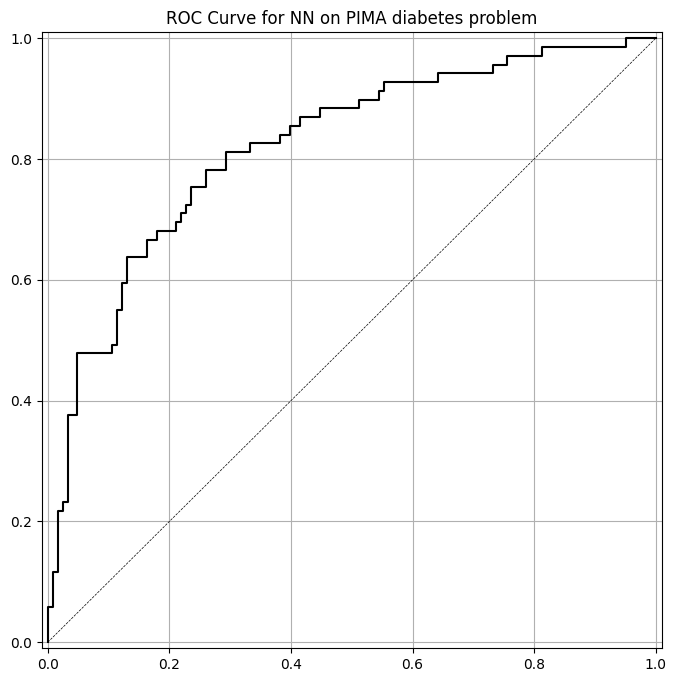

In [ ]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

**Remarks**: The ROC curve is an evaluation tools used in binary classification models such as this one [10]. It shows the false positive rate on the x-axis and the true positive rate on the y-axis.

On the other hand, the ROC-AUC or the ROC Area Under Curve score tells us "the probability that the scores given by a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one" [11]. Or in other words, it is a measure of the model's capability to distinguish between positive and negative classes in binary classification.

[10] J. Brownlee, “ROC Curves and Precision-Recall Curves for Imbalanced Classification - MachineLearningMastery.com,” MachineLearningMastery.com, Jan. 05, 2020. https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/ (accessed Mar. 31, 2024).
‌

[11] A. Fernández, S. García, M. Galar, R. C. Prati, B. Krawczyk, and F. Herrera, “Learning from Imbalanced Data Sets,” SpringerLink, 2018, doi: https://doi.org/10.1007-978-3-319-98074-4.
‌

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

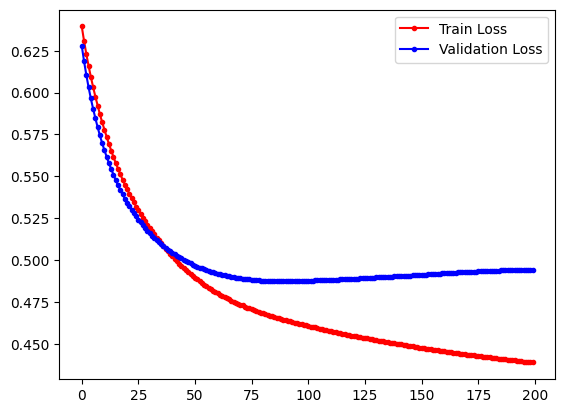

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

Train loss is the measure of how the model fits the training data [12]. Validation loss, on the other hand, is used to assess the model's performance on the testing data [12]. Testing data is the dataset that is unseen by the model.

The graph behavior above suggests that the model is **overfitting** [12]. Both losses are high, however, as it progresses, the validation loss becomes significantly higher than the train loss. Overfitting happens when the model was not able to perform well on unseen data or testing data [13]. This entails the need for retraining the model on possibly, more training data, *early stopping*, reducing model complexity, and among other techniques [13].

[12] baeldung, “Baeldung,” Baeldung on Computer Science, Feb. 19, 2022. https://www.baeldung.com/cs/training-validation-loss-deep-learning (accessed Mar. 31, 2024).
‌

[13] GfG, “ML Underfitting and Overfitting,” GeeksforGeeks, Nov. 23, 2017. https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/ (accessed Mar. 31, 2024).
‌

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epochs and network structures
* Interpret your result

For the supplementary activity, we will still use the same dataset.

In [ ]:
model_2 = Sequential([
    Dense(6, input_shape=(8,), activation="relu"), # hidden layer 1
    Dense(6, activation="relu"), # hidden layer 2
    Dense(1, activation="sigmoid") # final layer
])

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 6)                 54        
                                                                 
 dense_6 (Dense)             (None, 6)                 42        
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 103 (412.00 Byte)
Trainable params: 103 (412.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Use a learning rate of .003 and train for 1500 epochs

model_2.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 [==============================] - 1s 18ms/step - loss: 0.4040 - accuracy: 0.8142 - val_loss: 0.5519 - val_accuracy: 0.7552
Epoch 2/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.4038 - accuracy: 0.8125 - val_loss: 0.5518 - val_accuracy: 0.7552
Epoch 3/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.4039 - accuracy: 0.8142 - val_loss: 0.5519 - val_accuracy: 0.7552
Epoch 4/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.4038 - accuracy: 0.8125 - val_loss: 0.5519 - val_accuracy: 0.7552
Epoch 5/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.4039 - accuracy: 0.8142 - val_loss: 0.5517 - val_accuracy: 0.7552
Epoch 6/1500
18/18 [==============================] - 0s 6ms/step - loss: 0.4038 - accuracy: 0.8142 - val_loss: 0.5518 - val_accuracy: 0.7552
Epoch 7/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.4039 - accuracy: 0.8125 - val_loss: 0.5517 - val_accuracy: 0.7552
Epoch

In [ ]:
y_pred_class_nn_2 = (model_2.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_2 = model_2.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


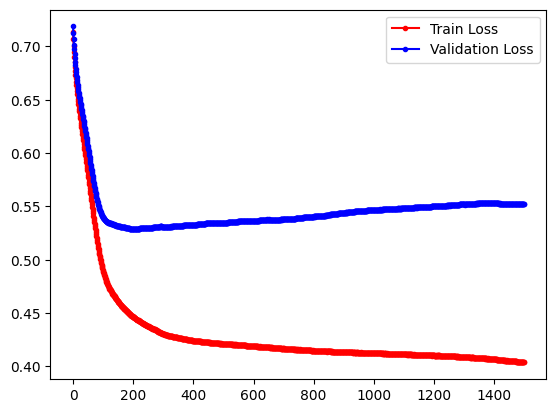

In [ ]:
#Graph the trajectory of the loss functions, accuracy on both train and test set

run_hist_2.history.keys()

fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

**Remarks**: The train and validation loss graph above stills shows that there is a gap between the validation and training loss. This graph behavior still suggests that the model is overfitting.

accuracy is 0.745
roc-auc is 0.807


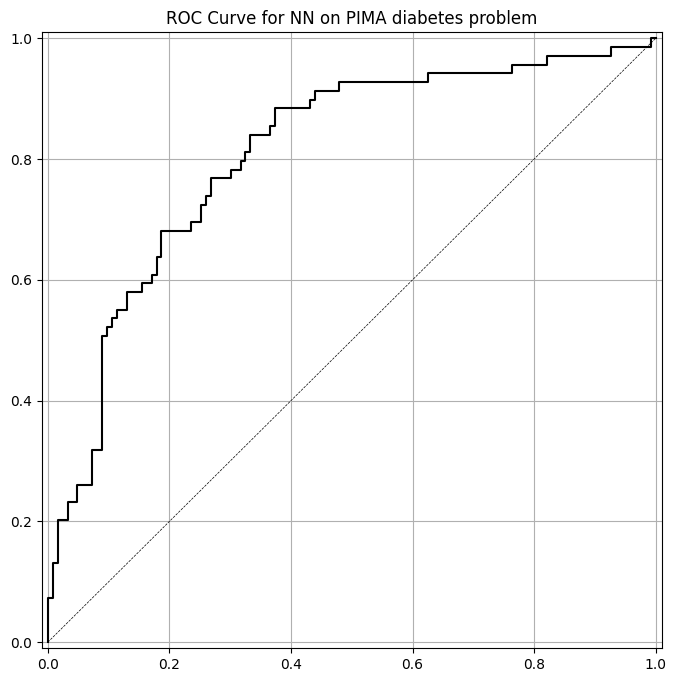

In [ ]:
# Plot the roc curve for the predictions

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN')



**Remarks**: The accuracy obtained from using the `accuracy_score` function is 0.745 or 74.5%, on the other hand, the ROC-AUC is 0.807 or 80.7%, a slight decrease from the values obtained from earlier test. Hence, it can be noted that increasing the epoch size does not automatically mean that the model will be able to "learn" better.

#### Trying other learning rates, number of epochs, and network structures:

In [ ]:
model_3 = Sequential([
    Dense(32, input_shape=(8,), activation="relu"), # hidden layer 1
    Dense(16, activation="sigmoid"), # hidden layer 2
    Dense(1, activation="sigmoid") # final layer
])

model_3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 32)                288       
                                                                 
 dense_39 (Dense)            (None, 16)                528       
                                                                 
 dense_40 (Dense)            (None, 1)                 17        
                                                                 
Total params: 833 (3.25 KB)
Trainable params: 833 (3.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_3.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_3 = model_3.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

Epoch 1/200
18/18 [==============================] - 1s 15ms/step - loss: 0.7112 - accuracy: 0.3750 - val_loss: 0.6935 - val_accuracy: 0.4896
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6876 - accuracy: 0.5868 - val_loss: 0.6765 - val_accuracy: 0.6510
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6723 - accuracy: 0.6476 - val_loss: 0.6656 - val_accuracy: 0.6510
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6621 - accuracy: 0.6562 - val_loss: 0.6582 - val_accuracy: 0.6458
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6550 - accuracy: 0.6580 - val_loss: 0.6533 - val_accuracy: 0.6406
Epoch 6/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6501 - accuracy: 0.6562 - val_loss: 0.6497 - val_accuracy: 0.6406
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6462 - accuracy: 0.6562 - val_loss: 0.6469 - val_accuracy: 0.6406
Epoch 8/200


In [ ]:
y_pred_class_nn_3 = (model_3.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_3 = model_3.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


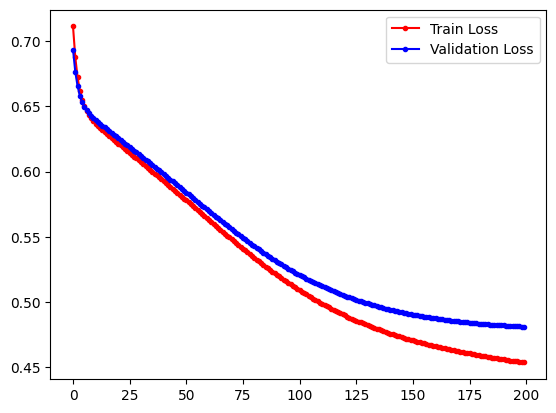

In [ ]:
# Plot losses

run_hist_3.history.keys()

fig, ax = plt.subplots()
ax.plot(run_hist_3.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_3.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

accuracy is 0.750
roc-auc is 0.830


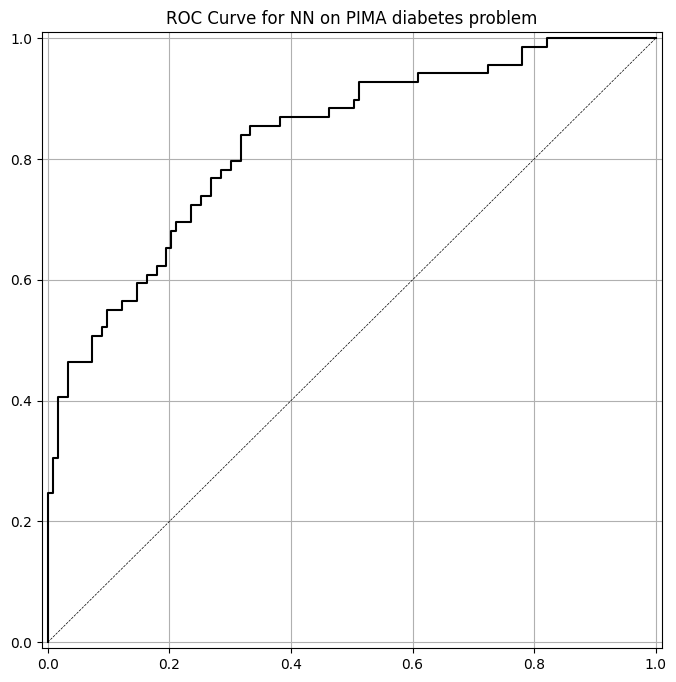

In [ ]:
# Plot the roc curve for the predictions

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_3)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_3)))

plot_roc(y_test, y_pred_prob_nn_3, 'NN')


### Trial 1 Results

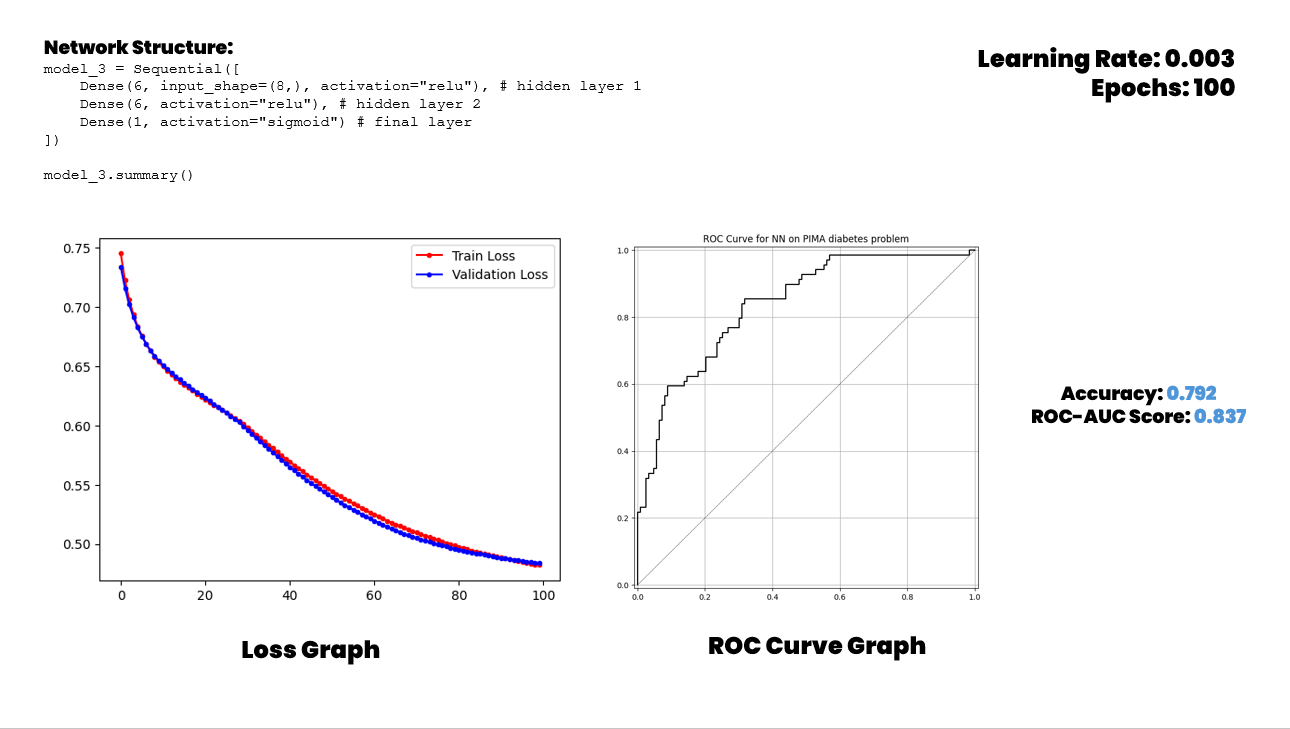

**First Variation**: For our first variation, we have decreased the epoch to 100. Here, we have obtained a better graph for the losses, however, we can still see that the validation loss starts to diverge away from the train loss. This is indicative that if we increase the epochs once more, we can still see that the model overfits. We also obtained slightly better accuracy and ROC-AUC scores. In this variation, we applied the **early stopping** method where we stopped the training to the point when the accuracy and loss do not change anymore—at epoch 100.

### Trial 2 Results

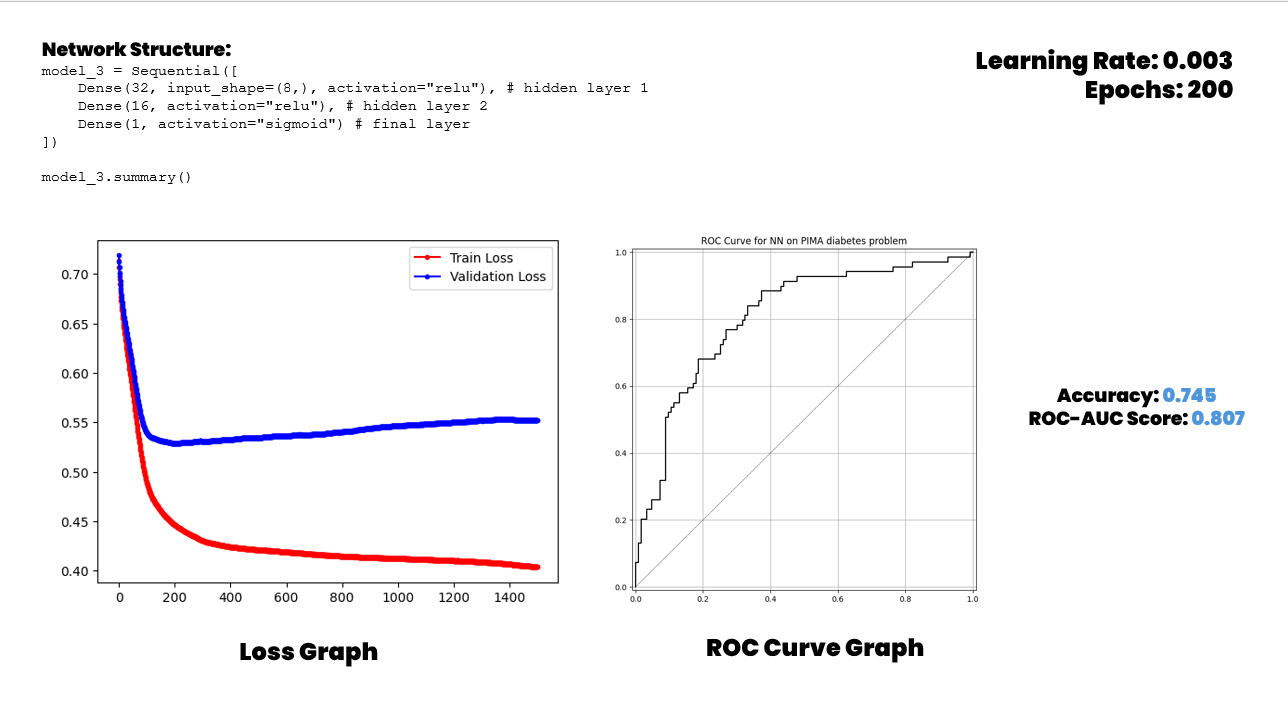

For our second trial, we have changed the network structure by adding more neurons in the layers and increasing the epoch size to 200. Based on the loss graph, we can see that the model still overfits similar to the one we have in the first part of the supplementary activity. The accuracy score and ROC-AUC score are also close. This experiment tells us that the number of changing the number of neurons may sometimes not product significant changes in the model's performance.  

### Trial 3 Results

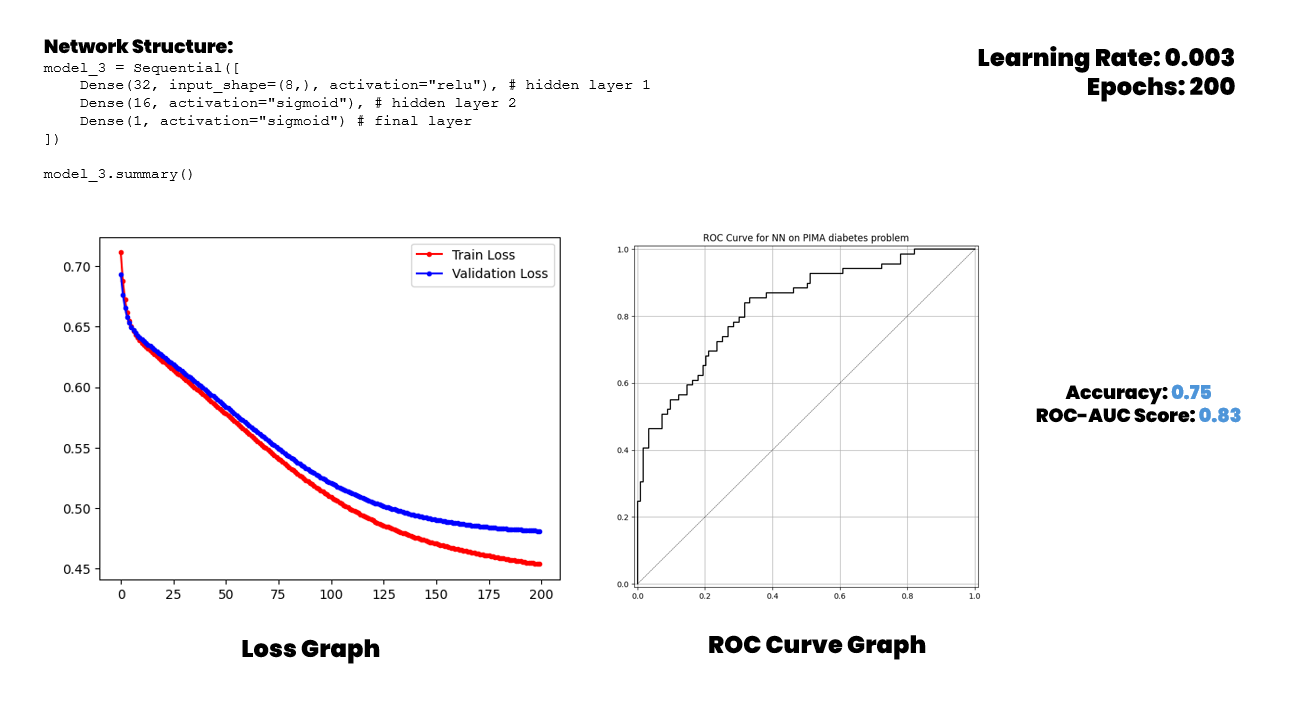

For our thirs variation, we changed the network structure once again by using the sigmoid as our activation function in our hidden layer 2. We can see that doing this change significantly affected the loss graph. We have obtained a graph with a smaller gap between the train loss and validation loss which could be indicative of a good fit [14].

[14] Simplilearn, “Overfitting And Underfitting Machine Learning | Machine Learning Tutorial For Beginners |Simplilearn,” YouTube. Sep. 11, 2020. Accessed: Mar. 31, 2024. [YouTube Video]. Available: https://www.youtube.com/watch?v=W-0-u6XVbE4
‌

#### Conclusion

This activity is a bit similar to the previous activity with additional highlights on the evaluation using graphs. Doing this activity taught me the following:

* Epochs determine the number of passes that the model will do on the entire dataset. Increasing or decreasing the epoch does not guarantee that the model will produce better results.

* Loss Graphs are helpful in evaluating the model's performance. It tells us if the model is underfitting, overfitting, or is just the right fit. Underfitting is when the graph shows no connection between the training loss and validation loss at all. In overfitting, we can see that the training loss and validation loss are close in the some parts but begin to diverge or produce a wide gap later on. A good fit shows a small gap between the training and validation loss with the training loss usually placed lower than the validation loss.

* Upon researching, there are techniques intended in solving underfitting and overfitting problems. For underfitting we have descreasing regularisation, increasing training duration, and feature selection [14]. For overfitting, we have early stopping, feature selection, and using more data as some solutions [15].
* ROC and ROC-AUC tells us the model's performance on determining the classes correctly. A perfect ROC-AUC score of 1 indicates that the model is able to perfectly distinguish the classes.

[15] “Overfitting and Underfitting in Machine Learning - Just Understanding Data,” Understanding Data, Apr. 19, 2023. https://understandingdata.com/posts/overfitting-and-underfitting-in-machine-learning/ (accessed Mar. 31, 2024).
‌

